In [17]:
import torch
import torch.nn as nn
import torch.optim as optim 
from torch.utils.data import DataLoader
import torchvision as tv
import torchvision.transforms as tr
import torchvision.datasets as dataset
import matplotlib.pyplot as plt

In [18]:
#device testing and hyper parameter

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 10
n_epoch = 100
lr = 0.001
inputSize = 28*28
hiddenSize = 500
classesNum = 10


In [19]:
#data and data loader

train_data = dataset.MNIST(root="./data", train=True, transform=tr.ToTensor(), download=True)
test_data = dataset.MNIST(root="./data", train=False, transform=tr.ToTensor(), download=True)

#data loader
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

Image batch shape: torch.Size([10, 1, 28, 28])
Label batch shape: torch.Size([10])
First label in batch: 1


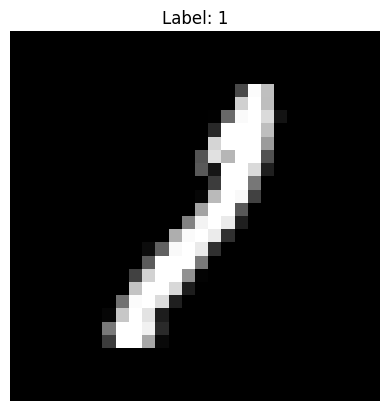

In [20]:
for images, labels in train_loader:
    print(f"Image batch shape: {images.shape}")   # [B, 1, 28, 28]
    print(f"Label batch shape: {labels.shape}")   # [B]
    print(f"First label in batch: {labels[0]}")
    
    # Optional: display the first image
    import matplotlib.pyplot as plt
    plt.imshow(images[0].squeeze(), cmap="gray")
    plt.title(f"Label: {labels[0].item()}")
    plt.axis("off")
    plt.show()
    break  # remove this to go through the whole dataset


In [21]:
#layer 

class NeuralNetwork(nn.Module):
    def __init__(self, inputSize, hiddenSize, classesNum):
        super().__init__()
        self.layer1 = nn.Linear(inputSize, hiddenSize)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hiddenSize, classesNum)

    def forward(self, X):
        out = self.layer1(X)
        out = self.relu(out)
        out = self.layer2(out)
        return out
    

In [25]:
model = NeuralNetwork(inputSize, hiddenSize, classesNum).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)
citration = nn.CrossEntropyLoss()


In [34]:
#training loop
for epoch in range(5):
    for index, (img, lable) in enumerate(train_loader):
        image = img.reshape(-1, 28*28).to(device)
        lable = lable.to(device)

        prediction = model(image)
        lossVal = citration(prediction, lable)
        lossVal.backward()
        optimizer.step()
        optimizer.zero_grad()

        print(f"Epoch [{epoch+1}/{5}], Step [{index+1}], Loss: {lossVal.item():.4f}")


Epoch [1/5], Step [1], Loss: 0.0047
Epoch [1/5], Step [2], Loss: 0.0001
Epoch [1/5], Step [3], Loss: 0.0032
Epoch [1/5], Step [4], Loss: 0.0016
Epoch [1/5], Step [5], Loss: 0.0047
Epoch [1/5], Step [6], Loss: 0.0005
Epoch [1/5], Step [7], Loss: 0.0402
Epoch [1/5], Step [8], Loss: 0.0006
Epoch [1/5], Step [9], Loss: 0.0001
Epoch [1/5], Step [10], Loss: 0.0000
Epoch [1/5], Step [11], Loss: 0.0001
Epoch [1/5], Step [12], Loss: 0.0018
Epoch [1/5], Step [13], Loss: 0.0011
Epoch [1/5], Step [14], Loss: 0.0021
Epoch [1/5], Step [15], Loss: 0.0002
Epoch [1/5], Step [16], Loss: 0.0050
Epoch [1/5], Step [17], Loss: 0.0013
Epoch [1/5], Step [18], Loss: 0.0633
Epoch [1/5], Step [19], Loss: 0.0000
Epoch [1/5], Step [20], Loss: 0.0000
Epoch [1/5], Step [21], Loss: 0.0000
Epoch [1/5], Step [22], Loss: 0.0000
Epoch [1/5], Step [23], Loss: 0.0064
Epoch [1/5], Step [24], Loss: 0.0218
Epoch [1/5], Step [25], Loss: 0.0384
Epoch [1/5], Step [26], Loss: 0.0000
Epoch [1/5], Step [27], Loss: 0.0017
Epoch [1/5

In [35]:
def check_accuracy(loader, model):
    correct = 0
    total = 0
    model.eval()  # eval mode disables dropout/batchnorm if present

    with torch.no_grad():
        for images, labels in loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            outputs = model(images)                # (B, num_classes)
            _, predicted = torch.max(outputs, 1)   # get class indices
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy:.2f}%")

check_accuracy(test_loader, model)

Accuracy: 98.07%


In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Load your image
img_path = "test.png"  # or use test_data[0][0] to grab from dataset
image = Image.open(img_path).convert('L')  # convert to grayscale

# Transform it (same as in training)
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),  # scales to [0,1] and gives (1,28,28)
])

image = transform(image)

# Reshape and send to device
image = image.view(-1, 28*28).to(device)  # shape: (1, 784)

# Make sure model is in eval mode
model.eval()

with torch.no_grad():
    output = model(image)  # shape: (1, num_classes)
    _, predicted = torch.max(output, 1)

print(f"Predicted digit: {predicted.item()}")
